Here we will predict property values in each of the previously selected zip codes

In [1]:
# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = DeprecationWarning)

# Standard Packages
import pandas as pd
import numpy as np
import datetime

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Location visualization
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import folium_static

In [3]:
# Load previously created dataframes
df1 = pd.read_pickle('data/df1.pkl')
df2 = pd.read_pickle('data/df2.pkl')
df3 = pd.read_pickle('data/df3.pkl')
df4 = pd.read_pickle('data/df4.pkl')
df5 = pd.read_pickle('data/df5.pkl')
df15 = pd.read_pickle('data/df15.pkl')

We will create a Baseline model using all 5 top zip codes combined, using only data that can be changed.

In [4]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 27 to 29889
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1193 non-null   int64  
 1   date           1193 non-null   object 
 2   price          1193 non-null   float64
 3   bedrooms       1193 non-null   int64  
 4   bathrooms      1193 non-null   float64
 5   sqft_living    1193 non-null   int64  
 6   sqft_lot       1193 non-null   int64  
 7   floors         1193 non-null   float64
 8   waterfront     1193 non-null   object 
 9   greenbelt      1193 non-null   object 
 10  nuisance       1193 non-null   object 
 11  view           1193 non-null   object 
 12  condition      1193 non-null   int64  
 13  heat_source    1193 non-null   object 
 14  sewer_system   1193 non-null   object 
 15  sqft_above     1193 non-null   int64  
 16  sqft_basement  1193 non-null   int64  
 17  sqft_garage    1193 non-null   int64  
 18  sqft_p

In [5]:
def regressionsm(df,X,y):
    model = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)
    
    model_OLS = sm.OLS(endog=y_train, exog=sm.add_constant(X_train_scaled)).fit()
    return model_OLS.summary()

In [8]:
X = df15.drop(columns=['price', 'id', 'date', 'sqft_lot', 'waterfront', 'greenbelt', 'nuisance', 'view', 'yr_built', 'yr_renovated', 'address', 'lat', 'long', 'heat_source', 'sewer_system'])
y = df15['price']

regressionsm(df15, X, y)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     154.3
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          5.38e-207
Time:                        12:57:44   Log-Likelihood:                -13455.
No. Observations:                 894   AIC:                         2.694e+04
Df Residuals:                     881   BIC:                         2.700e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.081e+06    2.8e+04     74.255      0.000    2.03e+06    2.14e+06
bedrooms       -1.71e+05   3.67e+04     -4.656      0.000   -2.43e+05   -9.89e+04
bathrooms      1.374e+05   5.08e+04      2.703      0.007    3.76e+04    2.37e+05
sqft_living    2.156e+05   1.31e+05      1.644      0.100   -4.17e+04    4.73e+05
floors        -6.864e+04   3.87e+04     -1.775      0.076   -1.45e+05    7252.439
condition      1.317e+05   5.55e+04      2.373      0.018    2.28e+04    2.41e+05
sqft_above     4.591e+05   1.15e+05      4.002      0.000    2.34e+05    6.84e+05
sqft_basement  2.173e+05   5.27e+04      4.123      0.000    1.14e+05    3.21e+05
sqft_garage   -2.857e+05   3.83e+04     -7.451      0.000   -3.61e+05    -2.1e+05
sqft_patio     7.171e+04   3.38e+04      2.121      0.034    5365.993    1.38e+05
zipcode        -5.69e+05   3.51e+04    -16.190      0.000   -6.38e+05      -5e+05
gradeno         3.81e+05   5.96e+04      6.395      0.000    2.64e+05    4.98e+05
class         -8.795e+04   6.08e+04     -1.446      0.149   -2.07e+05    3.14e+04
==============================================================================
Omnibus:                      371.974   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3516.323
Skew:                           1.633   Prob(JB):                         0.00
Kurtosis:                      12.150   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='price', ylabel='Count'>

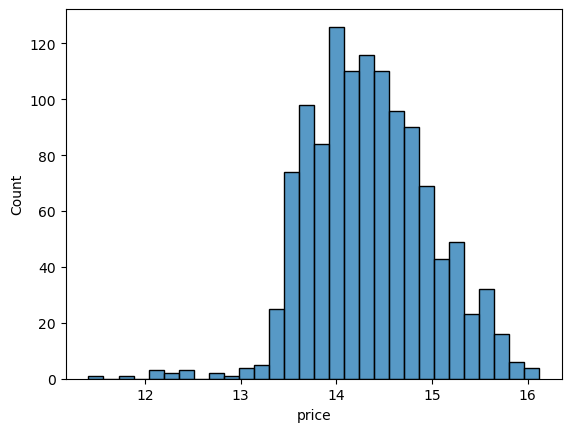

In [10]:
sns.histplot(np.log(df15['price']))